In [1]:
import importlib
import math
import os
import sys

src_path = os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(src_path)

import matplotlib.pyplot as plt
import numpy as np

import datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

# How many edges in the test split are duplicates and repeats?

For different train / test splits, we will look at the following quantities:
* **Duplicates** - Within the test split, what fraction of edges are duplicates?
* **Repeats** - What fraction of test edges already exist in the train split?

In [5]:
source = 'networkrepository'  # SNAP or networkrepository

if source == 'SNAP':
    data_dir = os.path.expanduser('~/Documents/Datasets/temporal-networks-snap')
    name = 'CollegeMsg.txt'
    path = os.path.join(data_dir, name)
    with open(path, 'r') as f:
        lines = f.readlines()

    if name.endswith('tsv'):
        separator = '\t'
        lines = np.array([line.split(separator)[:3] for line in lines[1:]], dtype=np.str)
        vertex_id = {j : i for (i, j) in enumerate(lines.flatten())}
        lines = np.array([vertex_id[v] for v in lines.flatten()]).reshape(lines.shape)
        lines = np.array([[int(x) for x in line] for line in lines])
    else:
        if name.endswith('txt'):
            separator = ' '
        elif name.endswith('csv'):
            separator = ','
        lines = np.array([[int(x) for x in line.split(separator)[:3]] for line in lines])
else:
    data_dir = os.path.expanduser('~/Documents/Datasets/temporal-networks-network-repository')
    name = 'fb-forum'
    path = os.path.join(data_dir, name, name+'.edges')
    with open(path, 'r') as f:
        lines = f.readlines()
        
    if name == 'soc-sign-bitcoinalpha':
        lines = np.loadtxt(path, delimiter=',', dtype=np.int64)
        lines = np.concatenate((lines[:, :2], lines[:, 3:]), axis=1)
    elif name == 'fb-forum' or name == 'ia-contacts_hypertext2009':
        lines = np.loadtxt(path, delimiter=',', dtype=np.float64)
        lines = np.array(lines, dtype=np.int64)
    elif name == 'ia-contact':
        lines = [line.split('\t') for line in lines]
        lines = [[*line[0].split(), line[1].split()[1]] for line in lines]
        lines = np.array(lines, dtype=np.int64)
    elif name == 'ia-enron-employees':
        lines = [line.split() for line in lines]
        lines = [[line[0], line[1], line[3]] for line in lines]
        lines = np.array(lines, dtype=np.int64)
    elif name == 'ia-radoslaw-email' or name == 'soc-wiki-elec':
        lines = [line.split() for line in lines[2:]]
        lines = [[line[0], line[1], line[3]] for line in lines]
        lines = np.array(lines, dtype=np.int64)
        
lines = lines[lines[:, 2].argsort()]
m = len(lines)

In [6]:
duplicates, repeats = [], []
splits = np.linspace(0.05, 0.95, 19)
static_train = set()
static_test = {(edge[0], edge[1]) for edge in lines}
cur = 0
for split in splits:
    idx = math.ceil(split*m)
    train, test = lines[:idx, :], lines[idx:, :]
    
    moving_edges = {(edge[0], edge[1]) for edge in lines[cur:idx]}
    staying_edges = {(edge[0], edge[1]) for edge in lines[idx:]}
    removals = moving_edges - staying_edges
    
    static_train.update(moving_edges)
    static_test = static_test - removals
    
    cur = idx
    
    # Within the test split, what fraction of edges are duplicates? 
    duplicate = 1 - len(static_test) / len(test)
    duplicates.append(duplicate)
    
    # What fraction of edges in the test split already exist in the train split?
    repeat = np.sum([(edge in static_train) for edge in static_test]) / len(static_test)
    repeats.append(repeat)
    
    print('Split: {:.2f}, duplicate: {:.3f}, repeat: {:.3f}'.format(split, duplicate, repeat))

Split: 0.05, duplicate: 0.790, repeat: 0.083
Split: 0.10, duplicate: 0.787, repeat: 0.141
Split: 0.15, duplicate: 0.786, repeat: 0.210
Split: 0.20, duplicate: 0.784, repeat: 0.278
Split: 0.25, duplicate: 0.779, repeat: 0.316
Split: 0.30, duplicate: 0.775, repeat: 0.349
Split: 0.35, duplicate: 0.770, repeat: 0.381
Split: 0.40, duplicate: 0.767, repeat: 0.424
Split: 0.45, duplicate: 0.761, repeat: 0.455
Split: 0.50, duplicate: 0.758, repeat: 0.490
Split: 0.55, duplicate: 0.758, repeat: 0.520
Split: 0.60, duplicate: 0.755, repeat: 0.552
Split: 0.65, duplicate: 0.752, repeat: 0.588
Split: 0.70, duplicate: 0.746, repeat: 0.615
Split: 0.75, duplicate: 0.738, repeat: 0.658
Split: 0.80, duplicate: 0.739, repeat: 0.668
Split: 0.85, duplicate: 0.718, repeat: 0.728
Split: 0.90, duplicate: 0.643, repeat: 0.773
Split: 0.95, duplicate: 0.525, repeat: 0.839


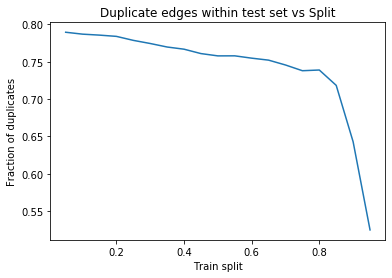

In [7]:
plt.xlabel('Train split')
plt.ylabel('Fraction of duplicates')
plt.title('Duplicate edges within test set vs Split')
plt.plot(splits, duplicates)

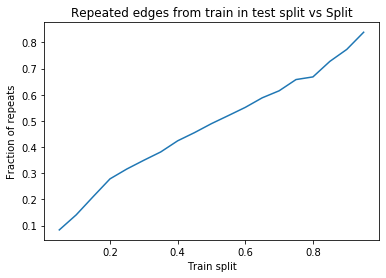

In [8]:
plt.xlabel('Train split')
plt.ylabel('Fraction of repeats')
plt.title('Repeated edges from train in test split vs Split')
plt.plot(splits, repeats)

# Look at some stuff about graph statistics like degree, etc.

In [3]:
duplicate_examples = True
repeat_examples = True

source = 'networkrepository'  # SNAP or networkrepository

if source == 'SNAP':
    data_dir = os.path.expanduser('~/Documents/Datasets/temporal-networks-snap')
    name = 'CollegeMsg.txt'
    dataset_name = 'CollegeMsg'
    path = os.path.join(data_dir, name)
else:
    data_dir = os.path.expanduser('~/Documents/Datasets/temporal-networks-network-repository')
    name = 'ia-contact'
    dataset_name = 'IAContact'
    path = os.path.join(data_dir, name, name+'.edges')
    
class_attr = getattr(importlib.import_module('datasets.link_prediction'), dataset_name)
dataset = class_attr(path, duplicate_examples=duplicate_examples, repeat_examples=repeat_examples)

--------------------------------
Reading dataset from /Users/raunak/Documents/Datasets/temporal-networks-network-repository/ia-contact/ia-contact.edges
Finished reading data.
Setting up graph.
Finished setting up graph.
Setting up examples.
Finished setting up examples.
Dataset properties:
Mode: train
Number of vertices: 274
Number of static edges: 1686
Number of temporal edges: 8473
Number of examples/datapoints: 11298
--------------------------------


In [7]:
timestamps = dataset.timestamps
for u in timestamps.keys():
    for v in timestamps[u].keys():
        print(len(timestamps[u][v]))

15
1
4
3
8
5
7
4
2
3
2
3
2
3
2
5
4
1
6
4
4
3
1
1
6
4
1
1
2
1
2
2
1
2
2
8
4
6
3
6
15
7
3
4
4
1
3
5
4
5
7
13
6
2
4
4
3
11
9
4
5
5
3
4
3
2
1
1
3
9
9
5
5
1
2
10
2
7
3
1
3
5
3
2
4
3
2
3
3
4
3
2
3
2
3
2
3
7
7
2
2
6
1
2
1
1
1
1
2
1
1
1
6
1
2
2
3
1
1
6
2
7
1
4
2
1
4
4
15
3
6
1
5
2
1
6
1
1
2
1
4
3
1
17
6
1
2
4
1
1
1
1
1
1
1
1
1
6
3
5
4
7
5
3
10
4
11
2
5
5
11
6
3
5
5
10
10
1
5
8
5
3
8
5
9
1
7
1
1
1
3
1
1
8
14
7
7
4
2
6
6
1
1
2
5
6
3
6
6
5
8
8
6
4
1
2
9
7
8
6
2
9
6
33
1
4
1
5
1
2
3
4
1
4
2
2
4
5
6
5
3
2
3
4
1
1
1
9
11
10
6
14
13
7
5
8
9
15
3
8
3
8
16
15
6
37
5
12
6
5
9
5
2
2
4
2
5
3
7
4
3
1
1
2
1
1
10
7
8
1
1
1
4
4
4
1
1
4
17
11
9
5
8
5
6
2
4
4
3
5
4
4
4
8
1
2
5
8
6
11
2
6
5
1
4
3
1
2
9
1
1
1
1
4
7
2
9
2
2
1
3
2
8
6
13
7
13
6
11
6
4
4
8
1
8
14
8
12
4
8
6
3
4
4
5
7
10
8
2
4
3
4
9
5
1
3
1
2
46
2
1
1
5
8
3
5
2
4
5
6
4
1
5
1
2
1
2
3
1
2
2
1
42
7
2
1
2
3
3
6
5
5
1
1
8
1
15
3
1
1
1
3
5
1
6
3
6
1
6
5
4
9
10
5
4
2
1
1
1
8
9
6
11
6
8
8
10
5
3
9
6
2
1
9
4
6
1
8
2
7
6
3
9
3
1
4
6
8
2
5
8
4
3
2
1
1
1
1
1
1
7